In [185]:
# importa las librerías a nuestro entorno de trabajo
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import pickle as pkl
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [186]:
#CARGAMOS LOS DATOS ORIGINALES
df = pd.read_csv("DataSet WeatherAUS.csv")

In [187]:
#VEMOS EL DATA SET ORIGINAL
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [188]:
df.describe()
#Media (mean): La media indica el valor promedio de una variable. Si las variables tienen medias
#cercanas a cero, es posible que no necesites aplicar el StandardScaler. 
#Sin embargo, si las medias son significativamente diferentes de cero,
#aplicar el StandardScaler puede ayudar a estandarizar las variables y centrarlas alrededor de cero.

#Desviación estándar (std): La desviación estándar indica la dispersión de los valores de 
#una variable con respecto a su media. Si las variables tienen desviaciones estándar
#similares y no son muy grandes, es posible que no necesites aplicar el StandardScaler. 
#Sin embargo, si las desviaciones estándar son significativamente diferentes entre las variables, 
#aplicar el StandardScaler puede ayudar a escalar las variables y eliminar las diferencias
#de escala entre ellas.

#min y max entre 0 y 1 respectivamente para ver si usar MIN Y MAX SCALER

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [189]:
#TIPOS DE DATOS
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [190]:
#Verifico los datos faltantes del dataset
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [191]:
#MANEJO DE MISSING VALUES
#Para Evaporation,Sunshine,Cloud9am,Cloud3pm como contienen arriba de 50mil datos nulos afectaria mucho eliminarlos por lo que
#se opto por usar una media de los valores imputandolos en los nulos ya que esta estrategia es bastante usada en investigaciones
#cientificas ya que no afectan a los datos y mas afectaria borrar esa cantidad enorme de datos, tambien pude haber usado la moda
#pero como son valores numeros que van cambiando bastante no existe como una moda especifica.

# Imputación media en Evaporation
evaporation_mean = df['Evaporation'].mean()
df['Evaporation'].fillna(evaporation_mean, inplace=True)

# Imputación media en Sunshine
sunshine_mean = df['Sunshine'].mean()
df['Sunshine'].fillna(sunshine_mean, inplace=True)

# Imputación media en Cloud9am y Cloud3pm
cloud9am_mean = df['Cloud9am'].mean()
df['Cloud9am'].fillna(cloud9am_mean, inplace=True)

cloud3pm_mean = df['Cloud3pm'].mean()
df['Cloud3pm'].fillna(cloud3pm_mean, inplace=True)

In [192]:
#PARA LOS NULS QUE TIENEN MENOS DE 15 MIL DATOS SE DECIDIO ELIMINARLOS YA QUE AUNQUE SE ELIMINEN SEGUIREMOS TENIENDO
#UNA CANTIDAD DE DATOS BASTANTE GIGANTE PASANDO DE 142000 A 125000 POR LO QUE AUN TENDREMOS UN DATASET SIGNIFICATIVO PARA LOS 
#ALGORITMOS DE MACHINE LEARNING y DEEP LEARNING
df.dropna(subset=['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
                  'WindDir9am','WindGustDir', 'WindDir3pm', 'Humidity9am', 'Humidity3pm',
                  'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm',
                  'RainToday'], inplace=True)

In [193]:
#Verificamos como quedo
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [194]:
#NOS DAMOS CUENTA QUE QUEDAMOS CON 113000 FILAS DE DATOS APROX, QUEDANDO CONFORME YA QUE AUN TENEMOS UNA CANTIDAD BASTANTE
#GRANDE DE DATOS PARA SER CONSIDERADOS POR LOS MODELOS DE PREDICCION QUE USAREMOS DESPUES
df.shape

(112925, 24)

In [195]:
#AHORA LOS CORRESPONDIENTES ENCODE 
#AQUI PARTIREMOS POR UN ONE HOT ENCODER PARA DATE CREAREMOS 3 NUEVAS COLUMNAS CADA UNA CON DIA MES Y AÑO 
#YA QUE SE ESTIMO QUE ES LA MEJOR FORMA PARA QUE EL ALGORITMO SEPA CADA UNA POR SEPARADO BIEN
#AL SER SOLO 3 VARIABLES ESTA BIEN CONSIDERAR AGREGAR SOLO 3 COLUMNAS
# Convertir la columna "Date" a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Crear nuevas columnas para mes, año y día
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Eliminar la columna original "Date"
df.drop('Date', axis=1, inplace=True)

In [196]:
#VEREMOS DE QUE AÑO HASTA QUE AÑO TENDREMOS LOS DATOS PARA LAS DESCICIONES FUTURAS Y TENER CLARO EL DATASET
#Y LO ORDENAMOS DE MAYOR A MENOR EN AÑOS PARA APRECIAR BIEN.
counts = df['Year'].value_counts().sort_index(ascending=False)
print(counts)

2017     6596
2016    13816
2015    13541
2014    13803
2013    13166
2012    12022
2011    12079
2010    13029
2009    13127
2008     1685
2007       61
Name: Year, dtype: int64


In [197]:
from sklearn.preprocessing import LabelEncoder
#El label encoding es más adecuado cuando no hay un orden o relación natural entre las categorías categóricas y 
#cuando el número de categorías es grande
# Crear una instancia de LabelEncoder
encoder = LabelEncoder()

# Aplicar label encoding a las columnas "WindGustDir", "WindDir9am" y "WindDir3pm"
df['WindGustDir'] = encoder.fit_transform(df['WindGustDir'])
df['WindDir9am'] = encoder.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = encoder.fit_transform(df['WindDir3pm'])
df['Location'] = encoder.fit_transform(df['Location'])


In [198]:
#AQUI USAMOS UN ENCODE NORMAL YA QUE SON SOLO 2 OPCIONES Y NO NOS SIRVE CREAR COLUMNAS NUEVAS CON ONE HOT YA QUE ESTAS 
#VARIABLES LAS USAREMOS EN LOS ALGORITMOS
df['RainToday'].replace(['No','Yes'], [0,1], inplace=True)
df['RainTomorrow'].replace(['No','Yes'], [0,1], inplace=True)


In [199]:
#vemos como quedaron los datos TODOS CON VARIABLES NUMERICAS
#TIPOS DE DATOS
df.dtypes

Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RISK_MM          float64
RainTomorrow       int64
Day                int64
Month              int64
Year               int64
dtype: object

In [200]:
#REVISAMOS EL DATA SET CON YA TODOS LOS DATOS TRATADOS
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.6,5.469824,7.624853,13,44.0,13,14,...,8.000000,4.503167,16.9,21.8,0,0.0,0,1,12,2008
1,1,7.4,25.1,0.0,5.469824,7.624853,14,44.0,6,15,...,4.437189,4.503167,17.2,24.3,0,0.0,0,2,12,2008
2,1,12.9,25.7,0.0,5.469824,7.624853,15,46.0,13,15,...,4.437189,2.000000,21.0,23.2,0,0.0,0,3,12,2008
3,1,9.2,28.0,0.0,5.469824,7.624853,4,24.0,9,0,...,4.437189,4.503167,18.1,26.5,0,1.0,0,4,12,2008
4,1,17.5,32.3,1.0,5.469824,7.624853,13,41.0,1,7,...,7.000000,8.000000,17.8,29.7,0,0.2,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,36,3.5,21.8,0.0,5.469824,7.624853,0,31.0,2,0,...,4.437189,4.503167,9.4,20.9,0,0.0,0,20,6,2017
142189,36,2.8,23.4,0.0,5.469824,7.624853,0,31.0,9,1,...,4.437189,4.503167,10.1,22.4,0,0.0,0,21,6,2017
142190,36,3.6,25.3,0.0,5.469824,7.624853,6,22.0,9,3,...,4.437189,4.503167,10.9,24.5,0,0.0,0,22,6,2017
142191,36,5.4,26.9,0.0,5.469824,7.624853,3,37.0,9,14,...,4.437189,4.503167,12.5,26.1,0,0.0,0,23,6,2017


In [201]:
#AHORA ES CORRECTO HACER LA CORRELACION CON LOS DATOS CORRECTAMENTE TRATADOS SUS DATOS FALTANTES Y LOS TIPOS DE ENCODES
#MAS APROPIADOS PARA PODER VER QUE SALGAN TODAS LAS VARIABLES CORRELACIONADAS YA QUE SIN SER NUMERICAS NO HUBIERAN APARECIDO
#Y CON NULLS HUBIERAN SIDO ENTORPECIDAS, ASI PODEMOS TOMAR DECICIONES MAS CONCRETAS PARA LOS ALGORITMOS DE PREDICCION
df.corr().style.background_gradient(cmap='coolwarm')

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Day,Month,Year
Location,1.000000,-0.009515,-0.050913,-0.004546,0.022948,-0.009752,0.032909,0.085213,-0.019989,0.022470,0.086070,0.084724,0.012638,0.043686,0.044653,0.058488,-0.001828,-0.012672,-0.035614,-0.055416,-0.000757,-0.004537,-0.000367,0.000168,-0.004811,0.046826
MinTemp,-0.009515,1.000000,0.728942,0.103807,0.383313,0.060255,-0.166074,0.159176,-0.066436,-0.168547,0.150577,0.146078,-0.218312,0.026733,-0.433645,-0.448298,0.059939,0.010868,0.898785,0.704477,0.044605,0.126769,0.078691,-0.000180,-0.212186,0.041207
MaxTemp,-0.050913,0.728942,1.000000,-0.076825,0.482124,0.363665,-0.224415,0.056742,-0.248406,-0.178135,-0.006114,0.013976,-0.517188,-0.497679,-0.312597,-0.411360,-0.244524,-0.236612,0.884925,0.984357,-0.242983,-0.044029,-0.168872,-0.002928,-0.172386,0.059110
Rainfall,-0.004546,0.103807,-0.076825,1.000000,-0.047702,-0.186720,0.044939,0.130388,0.084177,0.046577,0.085376,0.060288,0.238756,0.259652,-0.167595,-0.126520,0.177388,0.153455,0.007418,-0.080376,0.497554,0.317690,0.238379,0.002205,-0.033866,-0.010719
Evaporation,0.022948,0.383313,0.482124,-0.047702,1.000000,0.294929,-0.068150,0.149366,-0.084985,-0.045158,0.139097,0.085658,-0.407205,-0.316171,-0.206637,-0.227517,-0.165435,-0.158766,0.449518,0.468570,-0.155886,-0.036415,-0.098351,-0.007225,-0.025978,0.056849
Sunshine,-0.009752,0.060255,0.363665,-0.186720,0.294929,1.000000,-0.065409,-0.037373,-0.087004,-0.032653,-0.004804,0.024787,-0.380265,-0.478210,0.040261,-0.006954,-0.555954,-0.571590,0.231752,0.380368,-0.255051,-0.240547,-0.352307,-0.002219,0.018650,0.005633
WindGustDir,0.032909,-0.166074,-0.224415,0.044939,-0.068150,-0.065409,1.000000,0.134843,0.403542,0.601054,0.023290,0.099502,0.071479,0.049654,-0.139715,-0.041799,0.069274,0.067429,-0.203700,-0.240127,0.137906,-0.012602,0.051767,-0.000142,0.044894,-0.001729
WindGustSpeed,0.085213,0.159176,0.056742,0.130388,0.149366,-0.037373,0.134843,1.000000,0.025126,0.134630,0.589735,0.679223,-0.183729,-0.020903,-0.445046,-0.399751,0.066129,0.096128,0.124733,0.018325,0.154943,0.160990,0.238664,-0.009189,0.051085,-0.028109
WindDir9am,-0.019989,-0.066436,-0.248406,0.084177,-0.084985,-0.087004,0.403542,0.025126,1.000000,0.305955,0.010127,0.077561,0.153097,0.174934,-0.027734,0.070185,0.100548,0.061643,-0.158258,-0.252886,0.174094,-0.001515,0.029832,-0.006567,0.012312,0.002068
WindDir3pm,0.022470,-0.168547,-0.178135,0.046577,-0.045158,-0.032653,0.601054,0.134630,0.305955,1.000000,0.045438,0.092563,0.029611,-0.017852,-0.144080,-0.041820,0.045947,0.049050,-0.182641,-0.191912,0.126229,-0.023676,0.026099,-0.000075,0.032675,-0.004227


In [202]:
##CREAMOS EL ARCHIVO CSV DEPURADO PARA EL ALGORITMO Y TENEMOS PARA LLEGAR
#Y CARGARLOS DIRECTAMENTE A LOS ALGORITMOS QUE USAREMOS
from IPython.display import FileLink

nombre_archivo = 'DataSet WeatherAUSDEPURADOparaelALGORITMO.csv'
df.to_csv(nombre_archivo, index=False)

# Generar un enlace de descarga para el archivo CSV
enlace_descarga = FileLink(nombre_archivo)

enlace_descarga

C:\Users\josal\Documents\Python Scripts\DataSet WeatherAUSDEPURADOparaelALGORITMO.csv

In [203]:
#CARGAMOS EL DATASET DEPURADO PARA EL ALGORITMO
df = pd.read_csv("DataSet WeatherAUSDEPURADOparaelALGORITMO.csv")

In [204]:
#VEMOS LA PROPORCION ENTRE SI Y NO PARA DECIDIR SI USAR UNDERSAMPLING O OVERSAMPLING
df['RainTomorrow'].value_counts()

0    87906
1    25019
Name: RainTomorrow, dtype: int64

In [256]:
# REGRESION LOGISTICA, APRENDIZAJE SUPERVISADO
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#VAMOS A APLICAR REGRESION LOGISTICA CON UNDERSAMPLING QUE CONSISTE EN REDUCIR LAS
#INSTANCIAS DE LA CLASE MAYORITARIA EN ESTE CASO "NO" DE RAINTOMORROW QUE ES CASI 3 VECES A "SI", Y AL
#USAR UNDERSAMPLING SE ELIMINARIAN MUCHOS DATOS Y RESULT EN PERDIDA DE INFORMACION PERO UNDERSAMPLING
#SE USA CUANDO UN DATA SET GIGANTE COMO EL NUESTRO CON MAS DE 110000 DATOS Y SE SE PUEDE USAR
#CUANDO EL DESEQUILIBRIO DE CLASES NO TAN EXTREMO
#(3 A 1 ES ACEPTABLE YA QUE PODRIA SER PEOR COMO 20 A 1)
#ASI ESTO REDUCIRIA LA CLASE MAYORITARIA"NO" Y EVITA EL SESGO HACIA LA CLASE MAYORITARIA Y 
#PERMITIR QUE EL MODELO SE ENFOQUE EN LA CLASE MINORITARIA "SI".
#EN EL CASO DE SMOTE Y/O OVERSAMPLING, QUE SMOTE ES UNA TECNICA DE OVERSAMPLING QUE CREA INSTANCIAS
#SINTETICAS DE LA CLASE MINORITARIA AL TOMAR EN CUENTA A LOS VECINOS MAS CERCANOS EN EL ESPACIO DE
#CARACTERISTICAS PARECIDO AL OVERSAMPLING PERO UN POCO MAS ESPECIFICO, SE RECOMIENDA PERO NO ES EXCLUYENTE
#USAR EN DATASET MAS PEQUEÑOS YA QUE ESTA TECNICA PUEDE AYUDAR A MEJORAR LA REPRESENTACION DE LA CLASE
#MINORITARIA Y EVITAR UN SESGO HACIA LA CLASE MAYORITARIA. SIN EMBARGO SI EL NUMERO DE INSTANCIAS
#DE LA CLASE MINORITARIA ES MUY PEQUEÑO PUEDE HABER UN RIESGO DE SOBREAJUSTE.
#POR LO QUE PROBE LAS 2 FORMAS Y ME DIERON MUY PARECIDOS ASIQUE PROSEGUIMOS CON UNDERSAMPLING

# Obtener X y y
X = df.drop(['RISK_MM', 'RainTomorrow','Temp9am', 'Temp3pm', 'WindDir9am','WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm'], axis=1)
#X = df.drop(['RISK_MM', 'RainTomorrow'], axis=1)
y = df['RainTomorrow']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar el escalado de características
#Media (mean): La media indica el valor promedio de una variable. Si las variables tienen medias
#cercanas a cero, es posible que no necesites aplicar el StandardScaler. 
#Sin embargo, si las medias son significativamente diferentes de cero,
#aplicar el StandardScaler puede ayudar a estandarizar las variables y centrarlas alrededor de cero.
#en df.describe() nos dieron las mean NO eran cercanas a 0

#Desviación estándar (std): La desviación estándar indica la dispersión de los valores de 
#una variable con respecto a su media. Si las variables tienen desviaciones estándar
#similares y no son muy grandes, es posible que no necesites aplicar el StandardScaler. 
#Sin embargo, si las desviaciones estándar son significativamente diferentes entre las variables, 
#aplicar el StandardScaler puede ayudar a escalar las variables y eliminar las diferencias
#de escala entre ellas.
#en df.describe() nos dio que las std NO eran similares sino todas distintas.
#AQUI SE USA STANDARSCALER YA QUE ESTA TECNICA ES UTIL CUANDO LAS CARACTERISTICAS DE LOS DATOS TIENEN
#DIFERENTES ESCALAS Y VARIANZAS, LA REGRESION LOGISTICA EN ESTE CASO POR EJEMPLO, ES SENSIBLE
#A LA ESCALA DE LAS CARACTERISTIACS POR LO QUE SE RECOMIENDA APLICAR EL ESCALADO DE CARACTERISTICAS
#PARA ASEGURAR QUE TODAS TENGAN UNA ESCADA SIMILAR, YA QUE SI NO SE UTILIZA STANDARSCALER,
#LAS CARACTERISTICAS CON ESCALAS MAS GRANDES PUEDEN DOMINAR EN EL PROCESOS DE APRENDIZAJE Y AFECTAR
# EL RENDIMIENTO DEL MODELO, ADEMAS DE QUE ALGUNOS ALGORTIMOS BASADOS EN DISTANCIAS O GRADIENTES
#PUEDEN VERSE AFECTADOS POR LA ESCALA DE LAS CARACTERISITCAS, LO QUE PUEDE LLEVAR A UN MAL AJUSTE
#O CONVERGENCIA MAS LENTA DEL MODELO.AUNQUE TAMBEIN EXISTE EL MINMAXSCALER QUE ES UTIL CUANDO SE DESEA MANTENER
#LA INTERPRETACION DE LOS VALORES EN TERMINOS DE SU RELACION RELATIVA DENTRO DEL RANGO ESPECIFICADO
#QUE TAMBIEN FUE PROBADO PERO SE DECICIO POR STANDERSCALER POR QUE EL MODELO FUNCIONO MEJOR.

#scaler = MinMaxScaler() #MINMAXSCALER
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar undersampling
#smote = SMOTE(random_state=42) #SMOTE
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
#oversampler = RandomOverSampler(random_state=42) #OVERSAMPLER
#X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_scaled, y_train)

# Crear y ajustar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular las métricas de rendimiento
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)
sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)
puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo:')
print(puntajef1)
roc_auc = roc_auc_score(y_test, y_pred)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

Precisión del modelo:
0.5347644120426623
Exactitud del modelo:
0.7987159619216294
Sensibilidad del modelo:
0.7826516498715669
Puntaje F1 del modelo:
0.6353865896695541
Curva ROC - AUC del modelo:
0.7930035240912273


In [257]:
## Vector de Desempeño - Resumen de Métricas del Modelo
df2 = pd.DataFrame({'Modelo': ['Regresión Logística'],'Precisión': [precision], 'Exactitud': [exactitud], 
                   'Sensibilidad': [sensibilidad], 'F1': [puntajef1],'AUC': [roc_auc]})
df2

,Modelo,Precisión,Exactitud,Sensibilidad,F1,AUC
0,Regresión Logística,0.534764,0.798716,0.782652,0.635387,0.793004


In [152]:
#AQUI REVISAMOS QUE SE HAYA HECHO EL UNDERSANPLING CORRECTAMENTE(REDUCIR LA CLASE MAYORITARIA "NO") 
#ANTES DE VER LOS RESULTADOS
from collections import Counter
Counter(y_train_resampled)

Counter({0: 19958, 1: 19958})

In [258]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred,labels=[1, 0])
print('Matriz de Confusión:')
print(matriz)
#TENEMOS QUE LOS VERDADEROS POSITIVOS SON 3954, FALSOS NEGATIVOS 1107, FALSOS POSITIVOS 3347 
#VERDADEROS NEGATIVO 14177
#(True Positives) se refieren a las instancias que fueron clasificadas correctamente como
#"Sí" (lluvia) por el modelo y realmente pertenecen a la clase "Sí" según los datos de referencia. 
#En este caso, se indicó que los verdaderos positivos son 3954.
#Los falsos negativos (False Negatives) se refieren a las instancias que fueron incorrectamente
#clasificadas como "No" (sin lluvia) por el modelo, pero en realidad pertenecen a la clase "Sí". 
#En este caso, se indicó que los falsos negativos son 1107.
#Los falsos positivos (False Positives) se refieren a las instancias que fueron incorrectamente
#clasificadas como "Sí" (lluvia) por el modelo, pero en realidad pertenecen a la clase "No" (sin lluvia).
#En este caso, se indicó que los falsos positivos son 3347.
#Los verdaderos negativos (True Negatives) se refieren a las instancias que fueron clasificadas
#correctamente como "No" (sin lluvia) por el modelo y realmente pertenecen a la clase "No".
#En este caso, se indicó que los verdaderos negativos son 14177.

Matriz de Confusión:
[[ 3961  1100]
 [ 3446 14078]]


In [259]:
df2 = pd.DataFrame({'Predicción': y_pred.flatten(), 'Real': y_test.to_numpy()})
df2

,Predicción,Real
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
22580,0,0
22581,1,0
22582,0,0
22583,1,1


In [264]:
# ARBOL DE DECISION, APRENDIZAJE SUPERVISADO
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Obtener X e y
X = df.drop(['RISK_MM', 'RainTomorrow','Temp9am', 'Temp3pm', 'WindDir9am','WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm'], axis=1)
#X = df.drop(['RISK_MM', 'RainTomorrow'], axis=1)
y = df['RainTomorrow']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar el escalado de características
#scaler = MinMaxScaler() #MINMAXSCALER
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar undersampling
#smote = SMOTE(random_state=42) #SMOTE
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
#oversampler = RandomOverSampler(random_state=42)#OVERSAMPLER
#X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_scaled, y_train)

# Crear y ajustar el modelo de Árbol de Decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

#METRICAS
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)
sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)
puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo:')
print(puntajef1)
roc_auc = roc_auc_score(y_test, y_pred)
print('Curva ROC - AUC del modelo:')
print(roc_auc)


Precisión del modelo:
0.43817942898100587
Exactitud del modelo:
0.7300863404914767
Sensibilidad del modelo:
0.7247579529737206
Puntaje F1 del modelo:
0.5461584276354973
Curva ROC - AUC del modelo:
0.7281915763499053


In [265]:
## Vector de Desempeño - Resumen de Métricas del Modelo
df2 = pd.DataFrame({'Modelo': ['Arboles de Decisión'],'Precisión': [precision], 'Exactitud': [exactitud], 
                   'Sensibilidad': [sensibilidad], 'F1': [puntajef1],'AUC': [roc_auc]})
df2

,Modelo,Precisión,Exactitud,Sensibilidad,F1,AUC
0,Arboles de Decisión,0.438179,0.730086,0.724758,0.546158,0.728192


In [157]:
#AQUI REVISAMOS QUE SE HAYA HECHO EL UNDERSANPLING CORRECTAMENTE(REDUCIR LA CLASE MAYORITARIA "NO") 
#ANTES DE VER LOS RESULTADOS
from collections import Counter
Counter(y_train_resampled)

Counter({0: 19958, 1: 19958})

In [262]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred,labels=[1, 0])
print('Matriz de Confusión:')
print(matriz)
#TENEMOS QUE LOS VERDADEROS POSITIVOS SON 3954, FALSOS NEGATIVOS 1107, FALSOS POSITIVOS 3347 
#VERDADEROS NEGATIVO 14177
#(True Positives) se refieren a las instancias que fueron clasificadas correctamente como
#"Sí" (lluvia) por el modelo y realmente pertenecen a la clase "Sí" según los datos de referencia. 
#En este caso, se indicó que los verdaderos positivos son 3665.
#Los falsos negativos (False Negatives) se refieren a las instancias que fueron incorrectamente
#clasificadas como "No" (sin lluvia) por el modelo, pero en realidad pertenecen a la clase "Sí". 
#En este caso, se indicó que los falsos negativos son 1396.
#Los falsos positivos (False Positives) se refieren a las instancias que fueron incorrectamente
#clasificadas como "Sí" (lluvia) por el modelo, pero en realidad pertenecen a la clase "No" (sin lluvia).
#En este caso, se indicó que los falsos positivos son 4662 .
#Los verdaderos negativos (True Negatives) se refieren a las instancias que fueron clasificadas
#correctamente como "No" (sin lluvia) por el modelo y realmente pertenecen a la clase "No".
#En este caso, se indicó que los verdaderos negativos son 12862.

Matriz de Confusión:
[[ 3668  1393]
 [ 4703 12821]]


In [263]:
df2 = pd.DataFrame({'Predicción': y_pred.flatten(), 'Real': y_test.to_numpy()})
df2

,Predicción,Real
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
22580,0,0
22581,0,0
22582,0,0
22583,1,1


In [266]:
#PERCEPTRON MULTICAPA (MLP) RED NEURONAL, APRENDIZAJE SUPERVISADO
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Obtener X y y
X = df.drop(['RISK_MM', 'RainTomorrow','Temp9am', 'Temp3pm', 'WindDir9am','WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm'], axis=1)
#X = df.drop(['RISK_MM', 'RainTomorrow'], axis=1)
y = df['RainTomorrow']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar el escalado de características
#scaler = MinMaxScaler() #MINMAXSCALER
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar undersampling
#smote = SMOTE(random_state=42) #SMOTE
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
#oversampler = RandomOverSampler(random_state=42) #OVERSAMPLER
#X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_scaled, y_train)

# Crear y ajustar el modelo MLP
#(learning_rate_init=0.01 : 
#ESTE PUEDE TENER VALORES PEQUEÑOS ENTRE 0.1  O 0.01 SON APROPIADOS CON LOS DATOS
#SON RUIDOSOS O GRAN VARIABILIDAD, 
#0.5 O 0.3 MEDIANOS ESTOS FUNCIONAN BIEN EN MUCHOS CASOS SON BUEN PUNTO DE PARTIDA,
#Y GRANDES COMO 1 O MAS ESTOS SON UTILES CUANDO SON DATOS LIMPIOS Y BIEN COMPORTADOS PERO DEBEN UTILIZARZE CON PRECAUCION YAQUE UN VALOR
#DEMASIADO ALTOPUEDE LLEVAR A CONVERGENCIA LENTA O INESTABLE)
model = MLPClassifier(hidden_layer_sizes=(256,256), random_state=42, learning_rate_init=0.5)
model.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular las métricas de rendimiento
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)
sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)
puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo:')
print(puntajef1)
roc_auc = roc_auc_score(y_test, y_pred)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

# Guardar el modelo en un archivo pickle
#pickle.dump(model, open("modeloMLP.sav", "wb"))

Precisión del modelo:
0.6287487073422957
Exactitud del modelo:
0.8310382997564756
Sensibilidad del modelo:
0.600671803991306
Puntaje F1 del modelo:
0.6143896523848018
Curva ROC - AUC del modelo:
0.7491204260769131


In [267]:
#Precisión del modelo: Es la proporción de predicciones positivas correctas (verdaderos positivos) sobre el total de 
#predicciones positivas realizadas por el modelo. En este caso, la precisión del modelo es del 62.87%, 
#lo que significa que aproximadamente el 62.87% de las predicciones positivas del modelo son correctas.
#Precisión = Verdaderos Positivos / (Verdaderos Positivos + Falsos Positivos)

#Exactitud del modelo: Es la proporción de predicciones correctas (verdaderos positivos y verdaderos negativos) 
#sobre el total de predicciones realizadas por el modelo. En este caso, la exactitud del modelo es del 83.10%, 
#lo que significa que aproximadamente el 83.10% de todas las predicciones realizadas por el modelo son correctas.
#Exactitud = (Verdaderos Positivos + Verdaderos Negativos) / (Verdaderos Positivos + Falsos Positivos + Verdaderos Negativos + Falsos Negativos)

#Sensibilidad del modelo: También conocida como tasa de verdaderos positivos o recall, es la proporción de 
#casos positivos reales que son identificados correctamente por el modelo. En este caso,
#la sensibilidad del modelo es del 60.07%, lo que significa que el modelo es capaz de identificar correctamente 
#el 60.07% de los casos positivos reales.
#Sensibilidad = Verdaderos Positivos / (Verdaderos Positivos + Falsos Negativos)

#Puntaje F1 del modelo: Es una medida que combina la precisión y la sensibilidad del modelo en un solo valor.
#Representa la media armónica de ambos valores y proporciona una medida equilibrada del rendimiento del modelo.
#En este caso, el puntaje F1 del modelo es del 61.44%.
#Puntaje F1 = 2 * (Precisión * Sensibilidad) / (Precisión + Sensibilidad)

#Curva ROC - AUC del modelo: La curva ROC (Receiver Operating Characteristic) muestra 
#la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos a medida que se varía el 
#umbral de clasificación. El área bajo la curva (AUC) es una medida del rendimiento general del modelo. 
#En este caso, el AUC del modelo es del 74.91%, lo que indica un rendimiento razonablemente bueno en la clasificación de las clases.
#Curva Roc-auc= Area bajo la curva entre las tasa de verdaderos positivos y la tasa de falsos positivos

#En resumen, el modelo muestra una precisión y exactitud razonablemente altas, 
#lo que indica que tiene una buena capacidad para predecir correctamente las instancias positivas y negativas.
#Sin embargo, la sensibilidad del modelo es relativamente baja, lo que significa que hay un número significativo 
#de casos positivos reales que no son identificados correctamente por el modelo. El puntaje F1 del modelo es moderado,
#lo que indica un equilibrio entre la precisión y la sensibilidad. La curva ROC y el AUC muestran un rendimiento decente
#en la clasificación de las clases.

## Vector de Desempeño - Resumen de Métricas del Modelo
df2 = pd.DataFrame({'Modelo': ['Redes Neuronales'],'Precisión': [precision], 'Exactitud': [exactitud], 
                   'Sensibilidad': [sensibilidad], 'F1': [puntajef1],'AUC': [roc_auc]})
df2

,Modelo,Precisión,Exactitud,Sensibilidad,F1,AUC
0,Redes Neuronales,0.628749,0.831038,0.600672,0.61439,0.74912


In [253]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred,labels=[1, 0])
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[ 3040  2021]
 [ 1795 15729]]


In [254]:
#AQUI REVISAMOS QUE SE HAYA HECHO EL UNDERSANPLING CORRECTAMENTE(REDUCIR LA CLASE MAYORITARIA "NO") 
#ANTES DE VER LOS RESULTADOS
from collections import Counter
Counter(y_train_resampled)

Counter({0: 19958, 1: 19958})

In [255]:
df2 = pd.DataFrame({'Predicción': y_pred.flatten(), 'Real': y_test.to_numpy()})
df2

,Predicción,Real
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
22580,0,0
22581,0,0
22582,0,0
22583,1,1


In [ ]:
#>>>>>>>>>>>>>ESTE NO SE EJECUTA!! ES UN EJEMPLO!!!! DE EXPLICACION!!<<<<<<<<<<<<<<<<<<<<
#>SCORING<
#COMO SE EXPLICO SE TUBO QUE SIMULAR UN ESTADO DE DATOS REALES, PERO EN CASO DE QUE HUBIERAMOS CONSEGUIDO LOS DATOS DEL AÑO 2018
#EN ADELANTE LUEGO DE HABER GUARDADO el archivo sav con PICKLE, solo tendriamos que cargarlo asi y hacerle los respectivos
#ARREGLOS A LOS NUEVOS DATOS DEL 2018 EN ADELANTE QUE ERA EL STANDAR SCALER, PERO EL UNDERSAMPLING NO YA QUE ESO SOLO SE USA 
# EN LOS TRAIN YA QUE SE NECESITA TENER LOS TEST COMO ERAN ANTES PARA QUE EL ALGORTIRMO FUNCIONE DE MANERA OPTIMA
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import pickle

# Cargar el modelo entrenado previamente
modelo = pickle.load(open("modeloMLP.sav", "rb"))

# Cargar los nuevos datos(CONSIDERADOS DEPURADOS CON ENCODE Y MISSING VALUES)
nuevos_datos2018 = pd.read_csv("WeatherAustralia2018ENDELANTE.csv")

# Definir X e y para los nuevos datos
X_nuevos = nuevos_datos2018.drop(['RISK_MM', 'RainTomorrow'], axis=1)
y_nuevos = nuevos_datos2018['RainTomorrow']

# Preprocesar los nuevos datos (ejemplo: aplicar el escalado de características)
scaler = StandardScaler()
X_nuevos_scaled = scaler.transform(X_nuevos)

# Realizar predicciones en los nuevos datos
predicciones_nuevos = modelo.predict(X_nuevos_scaled)

# Calcular las métricas de rendimiento
precision = precision_score(y_nuevos, predicciones_nuevos)
print('Precisión del modelo:')
print(precision)
exactitud = accuracy_score(y_nuevos, predicciones_nuevos)
print('Exactitud del modelo:')
print(exactitud)
sensibilidad = recall_score(y_nuevos, predicciones_nuevos)
print('Sensibilidad del modelo:')
print(sensibilidad)
puntajef1 = f1_score(y_nuevos, predicciones_nuevos)
print('Puntaje F1 del modelo:')
print(puntajef1)
roc_auc = roc_auc_score(y_nuevos, predicciones_nuevos)
print('Curva ROC - AUC del modelo:')
print(roc_auc)


In [272]:
#SE CONSIDERO QUE EL ALGORITMO MLP DE REDES NEURONALES ES EL MAS OPTIMO Y EL QUE MEJOR SE COMPORTA POR LOS PARAMETROS
#OBTENIDOS POR LO CUAL AHORA SE LE APLICARA EL PROCESO DE SCORING, SIMULANDO UN ENTORNO EN CUAL SE PROCESAN CON DATOS REALES PARA
#HACER LA COMPARACION DE RESULTADOS, POR LO CUAL PARA PODER SIMULAR ESTA SITUACION
#PARA ESTO SE TOMARA EL MODELO CON MEJOR RENDIMIENTO DEL DATA SET QUE SE DEPURO SE TOMARA UNA MUESTRA PARA VOLVER A ENTRENARLO
#Y LA PARTE DE LA MUESTRA QUE SE DEJO SIN ENTRENAR SE USARA COMO "TEST" ESTO SE USARA PARA DETERMINAR SI ESQUE EL ALGORITMO 
#QUE SE ESCOGIO ES BUENO PAARA SITUACIONES "REALES" ASI SE MOSTRATAN LAS METRICAS RESPECTIVAS Y SE HARA LA COMPARACION
#PARA GENERAR ESTA SIMULACION EN TORNO A DATOS REALES SE ESTIMO QUE TENIAMOS 2 OPCIONES , OBTENER DATOS NUEVOS DESPUES DEL 2017
# O HACER UNA SIMULACION DE COMO SERIA ENTRETANANDO DENUEVO UNA MUESTRA DEL DATASET DEPURADO DE LOS AÑOS 2006 AL 2017
#CABE DESTACAR QUE AL NO TENER DATOS NUEVOS REALES Y PARA SIMULAR ESTO SE SEPARO EL DATASET CON LOS REALES SIENDO LOS DEL 2017
# Y EL RESTO LOS DEMAS AÑOS NO ES NECESARIO CREAR EL ARCHIVO SAV QUE SE GUARDARIA EN EL MODULO "PICKLE", UQE BASICAMENTE GUARDA YA EL
#MODELO ENTRENADO PARA SER USADO DESPUES CON LOS NUEVOS DATOS Y GENERAR EL SCORING, PERO AUN ASI ENTRENAREMOS LE NUEVO MODELO Y
#SE GENERARA EL MODULO PICLE PARA DEMOSTRAR QUE SE SABE USAR EL CODIGO, ES UN PASO MAS PERO ES PARA DEMOSTRAR QUE SE SABE OCUPAR
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Obtener X y y
#X = df.drop(['RISK_MM', 'RainTomorrow','Temp9am', 'Temp3pm', 'WindDir9am','WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm'], axis=1)
X = df.drop(['RISK_MM', 'RainTomorrow'], axis=1)
y = df['RainTomorrow']

# Separar los datos por años
X_train = X[X['Year'] < 2017]
y_train = y[X['Year'] < 2017]
X_test = X[X['Year'] == 2017]
y_test = y[X['Year'] == 2017]

# Aplicar undersampling al conjunto de entrenamiento
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Aplicar el escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Crear y ajustar el modelo MLP
model = MLPClassifier(hidden_layer_sizes=(100), random_state=42)
model.fit(X_train_scaled, y_train_resampled)

# Guardar el modelo en un archivo pickle
pickle.dump(model, open("modeloMLP.sav", "wb"))

# Cargar el modelo desde el archivo pickle
loaded_model = pickle.load(open("modeloMLP.sav", "rb"))

# Realizar predicciones en el conjunto de prueba
y_pred = loaded_model.predict(X_test_scaled)

# Calcular las métricas de rendimiento
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)
sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)
puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo:')
print(puntajef1)
roc_auc = roc_auc_score(y_test, y_pred)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

Precisión del modelo:
0.5064874884151993
Exactitud del modelo:
0.7951788963007883
Sensibilidad del modelo:
0.7926033357505439
Puntaje F1 del modelo:
0.6180378852134577
Curva ROC - AUC del modelo:
0.7942315126136272


In [166]:
## Vector de Desempeño - Resumen de Métricas del Modelo
df2 = pd.DataFrame({'Modelo': ['Regresión Logística'],'Precisión': [precision], 'Exactitud': [exactitud], 
                   'Sensibilidad': [sensibilidad], 'F1': [puntajef1],'AUC': [roc_auc]})
df2

,Modelo,Precisión,Exactitud,Sensibilidad,F1,AUC
0,Regresión Logística,0.506487,0.795179,0.792603,0.618038,0.794232


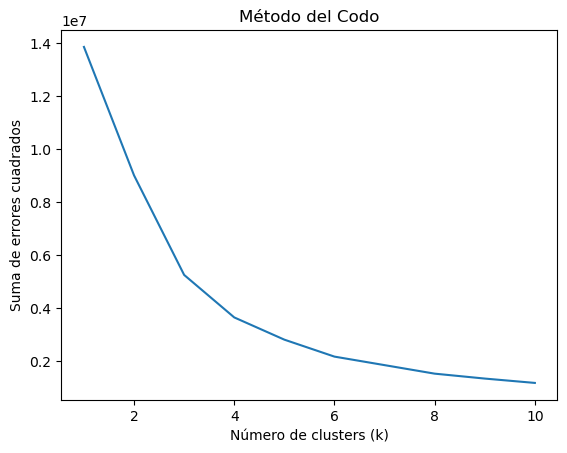

In [99]:
#METODO DEL CODO PARA USAR EL K EN KMEANS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Obtener las variables de temperatura máxima y Rainfall
X = df[['MaxTemp', 'Rainfall']]

# Realizar el método del codo para determinar el número óptimo de clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar la curva del codo
plt.plot(range(1, 11), inertia)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Suma de errores cuadrados')
plt.title('Método del Codo')
plt.show()



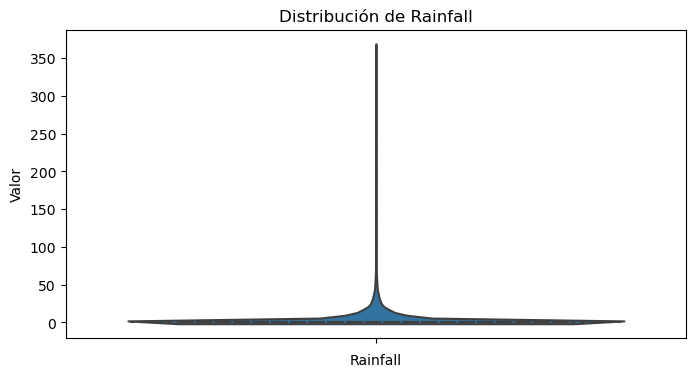

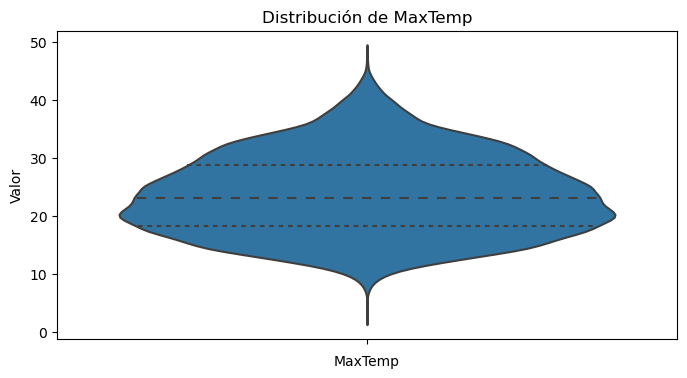

In [100]:
# Diagrama de violín para Rainfall
plt.figure(figsize=(8, 4))
sns.violinplot(data=df, y='Rainfall', inner='quartile', orient='h')
plt.xlabel('Rainfall')
plt.ylabel('Valor')
plt.title('Distribución de Rainfall')
plt.show()

# Diagrama de violín para MaxTemp
plt.figure(figsize=(8, 4))
sns.violinplot(data=df, y='MaxTemp', inner='quartile', orient='h')
plt.xlabel('MaxTemp')
plt.ylabel('Valor')
plt.title('Distribución de MaxTemp')
plt.show()

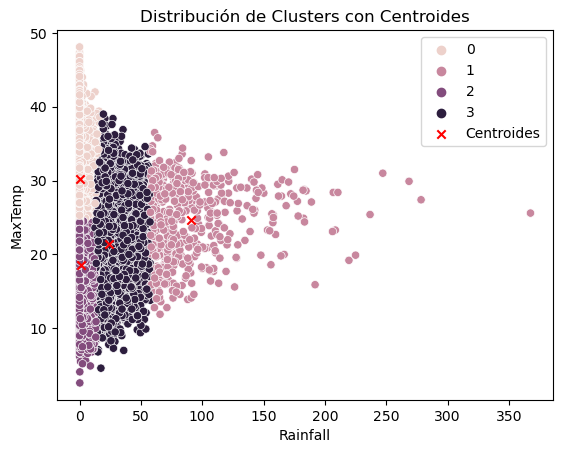

In [101]:
#USANDO KMEANS APRENDIZAJE NO SUPERVISADO
# Determinar el número óptimo de clusters basado en el gráfico del método del codo
k = 4

# Aplicar K-Means con el número óptimo de clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Obtener las etiquetas de los clusters asignados a cada muestra
labels = kmeans.labels_

# Agregar las etiquetas de los clusters al dataframe original
df['Cluster'] = labels

# Diagrama de dispersión de los clusters con centroides
sns.scatterplot(data=df, x='Rainfall', y='MaxTemp', hue='Cluster')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], marker='x', color='red', label='Centroides')
plt.xlabel('Rainfall')
plt.ylabel('MaxTemp')
plt.title('Distribución de Clusters con Centroides')
plt.legend()
plt.show()

In [ ]:
#KMEANS CON 4 CLUSTERS POR EL METODO DEL CODO,
#SE DECIDIO CON LA VARIABLE Rainfall QUE ES LA LLUVIA EN MM y TempMax que es la
#temperatura maxima, pudimos estos cluster poder deducirlos en 4 grupos con las
#caracteristicas obserbables en el grafico de distribucion con sus centroides

#GRUPO 1= Temperatura maxima Baja entre aprox 5°C y 25°C con lluvias leves 
#entre 0 MM y 25 mm aprox

#GRUPO 2= Temperatura maxima Alta entre aprox 25°C y 50°C con lluvias leves 
#entre 0 MM y 25 mm aprox

#GRUPO 3= Temperatura maxima Media entre aprox 5°C y 40°C con lluvias Moderadas 
#entre 25 MM y 60 mm aprox

#GRUPO 4= Temperatura maxima Media entre aprox 10°C y 35°C con lluvias Fuertes 
#entre 60 MM y 350 mm aprox


In [ ]:
#AHORA LA FASE FINAL CREAREMOS UN DASHBOARD INTERACTIVO PARA MOSTRAR LAS TENDENCIAS

#PARA ESTO DEPURAREMOS EL DATA SET ORIGINAL PARA EL USUARIO QUE SIGNIFICA QUE NO ES PARA EL ALGORITMO SINO PARA
#MOSTRAR LOS DATOS DE LA MANERA QUE SE ESTIMA CONVENIENTE MEDIANTE EL DASHBOARD INTERACTIVO, QUE EN ESTE CASO SE USARA UN
#GRAFICO DE DISPERSION EL CUAL AVANZARA MES A MES DURANTE TODOS LOS AÑOS PARA MOSTRAR LAS TENDENCIAS EN EL CAMBIO
# DE LAS TEMPERATURAS MAXIMAS VIENDO QUE TANTO LLUEVE EN CADA PAIS AL PASAR LOS MESES Y AÑOS.


In [167]:
import plotly.express as px
import pandas as pd
from datetime import datetime

In [168]:
import pandas as pd
df = pd.read_csv("DataSet WeatherAUS.csv")

In [169]:
#QUITAMOS TODAS LAS QUE TIENEN NULOS PARA NO ENTORPECER LA MUESTRA DE LOS DATOS QUE QUEREMOS MOSTRAR
df = df.dropna(subset=['MinTemp'])
df = df.dropna(subset=['MaxTemp'])
df = df.dropna(subset=['Rainfall'])

#PASAMOS LAS TEMPERATURAS Y LA LLUVIA CAIDA A INT YA QUE ESTABAN EN FLOAT Y LA HERRAMIENTA DE DASHBOARD POWERBI
#TENIA PROBLEMAS PARA MOSTRAR CORRECTAMENTE LOS DATOS CON FLOAT.
df['MinTemp'] = df['MinTemp'].astype(int)
df['MaxTemp'] = df['MaxTemp'].astype(int)
df['Rainfall'] = df['Rainfall'].astype(int)

In [170]:
#SE DECIDIO CREAR UNA NUEVA COLUMNA SOLO CON MES Y AÑO YA QUE SE CONSIDERO
#QUE SE MUESTRAN DE MANERA MAS CORRECTA LOS DATOS PASANDO EL TIEMPO Y SE LOGRA VER CLARAMENTE EL CAMBIO
#DE LAS TEMPERATUAS MAXIMAS AL PASAR LOS AÑOS Y NOTANDO LA CANTIDAD DE LLUVIA QUE CAE
#EN CADA CIUDAD DE AUSTRALIA, NOTANDO UNA CLARA PREOCUPACION ENTORNO AL CALENTAMIENTO GLOBAL YA QUE
#AL PASAR LOS AÑOS HACIA LOS ULTIMOS AÑOS SE NOTA UN CLARA SUBIDA DE LAS TEMPERATURAS MAXIMAS

# Convertir la columna de fecha al formato adecuado
df['Date'] = pd.to_datetime(df['Date'])

# Crear la columna de mes y año
df['Month_Year'] = df['Date'].dt.to_period('M')
df
#VEMOS QUE SE CREO CORRECTAMENTE LA NUEVA COLUMNA CLAVE PARA NUESTRO DIAGRAMA DE DISPERSION

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Month_Year
0,2008-12-01,Albury,13,22,0,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,2008-12
1,2008-12-02,Albury,7,25,0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,2008-12
2,2008-12-03,Albury,12,25,0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,2008-12
3,2008-12-04,Albury,9,28,0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,2008-12
4,2008-12-05,Albury,17,32,1,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,2008-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3,21,0,NaN,NaN,E,31.0,ESE,...,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No,2017-06
142189,2017-06-21,Uluru,2,23,0,NaN,NaN,E,31.0,SE,...,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No,2017-06
142190,2017-06-22,Uluru,3,25,0,NaN,NaN,NNW,22.0,SE,...,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No,2017-06
142191,2017-06-23,Uluru,5,26,0,NaN,NaN,N,37.0,SE,...,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,2017-06


In [171]:

from IPython.display import FileLink

nombre_archivo = 'DataSet WeatherAUSDEPURADOparaelUSUARIOPOWERBI.csv'
df.to_csv(nombre_archivo, index=False)

# Generar un enlace de descarga para el archivo CSV
enlace_descarga = FileLink(nombre_archivo)

enlace_descarga

#UNA VEZ TENEMOS DEPURADO EL DATASET LO DESCARGAMOS Y SUBIMOS A POWER BI PARA GENERAR
#EL GRAFICO DE DISPERSION INTERACTIVO QUE AVANZARA CON LAS FECHAS

C:\Users\josal\Documents\Python Scripts\DataSet WeatherAUSDEPURADOparaelUSUARIOPOWERBI.csv

In [172]:
from IPython.display import HTML

# Especificar el enlace externo a tu dashboard
dashboard_url = 'https://app.powerbi.com/reportEmbed?reportId=79dbbc75-117f-43be-8c03-675e8b0b67f6&autoAuth=true&ctid=72fd0b5a-8a6a-4cff-89f6-bde961f7e250'

# Mostrar el dashboard en Jupyter Notebook
HTML(f'<iframe title="DashboardinteractivoEntrega3Josesalas" width="1140" height="541.25" src="https://app.powerbi.com/reportEmbed?reportId=79dbbc75-117f-43be-8c03-675e8b0b67f6&autoAuth=true&ctid=72fd0b5a-8a6a-4cff-89f6-bde961f7e250" frameborder="0" allowFullScreen="true"></iframe>')